## Looking at balance sheets and financial statements for companies
*Selected companies follow points mentioned by William Ackman in Big Think Video*
1. Companies have barriers to entry, lower chance of new competition (e.g. TSLA, COKE, AAPL)
2. Generally immune to extrinsic factors
3. Strong understanding of how these companies make money

In [77]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as web
import datetime as dt
import json
api_key = '1d10376fbb56abe7a58f35989e4184f5'
company = 'SQ'
years = 3

In [78]:
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarterly&limit={years}&apikey={api_key}')
balance_sheet = balance_sheet.json()
print('--Keys for balance sheet--')
print(balance_sheet[0].keys())

--Keys for balance sheet--
dict_keys(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate', 'acceptedDate', 'calendarYear', 'period', 'cashAndCashEquivalents', 'shortTermInvestments', 'cashAndShortTermInvestments', 'netReceivables', 'inventory', 'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets', 'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt', 'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities', 'otherLiabilities', 'capitalLeaseObligations', 'totalLiabilities', 'preferredStock', 'commonStock', 'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss', 'othertotalStockholdersEquity', 'totalStockholdersEquity', 'totalLia

In [79]:
financial_statement = requests.get(f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?limit={years}&apikey={api_key}')
financial_statement = financial_statement.json()
print('--Keys for financial statement--')
#print(financial_statement[0].keys())
print(financial_statement)

--Keys for financial statement--
[{'symbol': 'SQ', 'date': '2020-12-31', 'period': 'FY', 'revenueGrowth': 1.014973586506842, 'grossProfitGrowth': 0.44648922968642923, 'ebitgrowth': -1.7084761079941257, 'operatingIncomeGrowth': -1.7084761079941257, 'netIncomeGrowth': -0.43239507146167494, 'epsgrowth': -0.4545454545454546, 'epsdilutedGrowth': -0.45679012345679015, 'weightedAverageSharesGrowth': 0.04265186506321191, 'weightedAverageSharesDilutedGrowth': 0.03452441232760323, 'dividendsperShareGrowth': 0.0, 'operatingCashFlowGrowth': -0.18058016014636064, 'freeCashFlowGrowth': -0.3968244126378655, 'tenYRevenueGrowthPerShare': 10.030613956020646, 'fiveYRevenueGrowthPerShare': 1.8839509187421657, 'threeYRevenueGrowthPerShare': 2.671906499421607, 'tenYOperatingCFGrowthPerShare': -5.041759324522933, 'fiveYOperatingCFGrowthPerShare': 4.322878982824911, 'threeYOperatingCFGrowthPerShare': 1.5579347474064604, 'tenYNetIncomeGrowthPerShare': -2.3084974234834252, 'fiveYNetIncomeGrowthPerShare': -1.455

In [80]:
current_assets = balance_sheet[0]['totalCurrentAssets']
current_liabilities = balance_sheet[0]['totalCurrentLiabilities']
total_debt = balance_sheet[0]['totalDebt']
cash_and_equivalents = balance_sheet[0]['cashAndCashEquivalents']
print(f'Cash-Debt Difference of {company} = {cash_and_equivalents - total_debt}')
print(f'Assets-liabilities of {company} = {current_assets-current_liabilities}')

Cash-Debt Difference of SQ = 107040000
Assets-liabilities of SQ = 3635525000


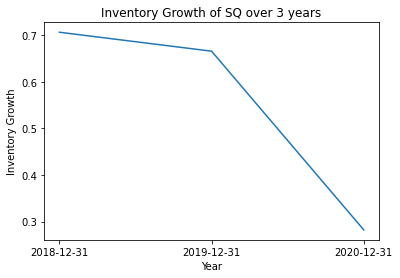

In [81]:
inventory_0 = financial_statement[0]['inventoryGrowth']
inventory_1 = financial_statement[1]['inventoryGrowth']
inventory_2 = financial_statement[2]['inventoryGrowth']
inventory_data = [inventory_2, inventory_1, inventory_0]

plt.plot([1,2,3], inventory_data)
plt.title(f'Inventory Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('Inventory Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

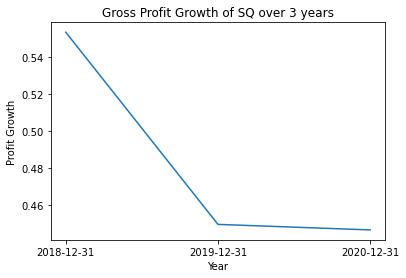

In [82]:

profit_0 = financial_statement[0]['grossProfitGrowth']
profit_1 = financial_statement[1]['grossProfitGrowth']
profit_2 = financial_statement[2]['grossProfitGrowth']
profit_data = [profit_2, profit_1, profit_0]

plt.plot([1,2,3], profit_data)
plt.title(f'Gross Profit Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('Profit Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

**Specifially, stocks with EPS growth rates of at least 25% compared with year-ago levels suggest a company has products or services in strong demand**

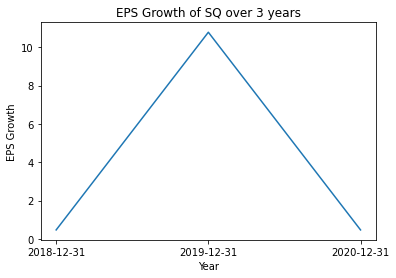

In [83]:
eps_0 = financial_statement[0]['epsgrowth']
eps_1 = financial_statement[1]['epsgrowth']
eps_2 = financial_statement[2]['epsgrowth']
eps_data = [eps_2, eps_1, eps_2]

plt.plot([1,2,3], eps_data)
plt.title(f'EPS Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('EPS Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

# Company buy rating based upon financialmodelingprep api
[More Info](https://site.financialmodelingprep.com/developer/docs/recommendations-formula)

In [84]:
buy_rating = requests.get(f'https://financialmodelingprep.com/api/v3/rating/{company}?apikey={api_key}')
buy_rating = buy_rating.json()
format_buy_rating = json.dumps(buy_rating, indent=2)
print(format_buy_rating)

[
  {
    "symbol": "SQ",
    "date": "2021-11-24",
    "rating": "S-",
    "ratingScore": 5,
    "ratingRecommendation": "Strong Buy",
    "ratingDetailsDCFScore": 5,
    "ratingDetailsDCFRecommendation": "Strong Buy",
    "ratingDetailsROEScore": 3,
    "ratingDetailsROERecommendation": "Neutral",
    "ratingDetailsROAScore": 3,
    "ratingDetailsROARecommendation": "Neutral",
    "ratingDetailsDEScore": 5,
    "ratingDetailsDERecommendation": "Strong Buy",
    "ratingDetailsPEScore": 5,
    "ratingDetailsPERecommendation": "Strong Buy",
    "ratingDetailsPBScore": 5,
    "ratingDetailsPBRecommendation": "Strong Buy"
  }
]


# Looking for Head Shoulder Trends
[More Info](https://www.investopedia.com/terms/h/head-shoulders.asp)

Text(0.5, 0, 'January --> Today')

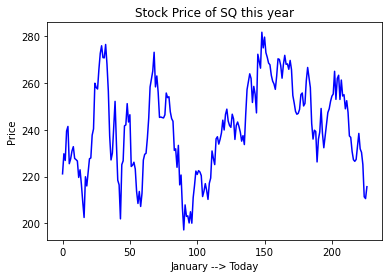

In [85]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()
data = web.DataReader(company, 'yahoo', start, end)
closing_prices = data['Close'].values
plt.plot(closing_prices, color='blue')
plt.title(f'Stock Price of {company} this year')
plt.ylabel('Price')
plt.xlabel('January --> Today')